In [1]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install keras-tuner
%pip install visualkeras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install numpy
%pip install tensorflow
%pip install matplotlib
%pip install opencv-python
%pip install pandas
%pip install pillow
%pip install visualkeras
%pip install keras-tuner
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os,glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import PIL
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras import layers, models, optimizers, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import visualkeras as vk
import keras_tuner as kt
from keras_tuner import HyperParameters as hp
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,classification_report,ConfusionMatrixDisplay
folder='Keras_tuner'
os.makedirs(folder, exist_ok=True)

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)


    # For each metric
    for i, metric_name in enumerate(metrics):
        # Get the axis for the current metric
        if len(metrics)==1:
            ax = axes
        else:
            ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()
    return fig, axes

In [7]:

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False, values_format=".2f"):
    """Modified version of classification metrics function from Intro to Machine Learning.
    Updates:
    - Reversed raw counts confusion matrix cmap (so darker==more).
    - Added arg for normalized confusion matrix values_format
    """
    # Get the classification report
    report = classification_report(y_true, y_pred)

    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)

    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    # Create a confusion matrix of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None,
                                            cmap="gist_gray_r", # Updated cmap
                                            values_format="d",
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")

    # Create a confusion matrix with the data with normalize argument
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap,
                                            values_format=values_format, # New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")

    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()

    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict

In [8]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,figsize=(6,4), normalize='true',
    output_dict = False,cmap_train='Blues', cmap_test="Reds",colorbar=False):
  y_train_pred = model.predict(X_train)
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
    output_dict=True, figsize=figsize,colorbar=colorbar, cmap=cmap_train,label='Training Data')
  print()
  y_test_pred = model.predict(X_test)
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
    output_dict=True,figsize=figsize,colorbar=colorbar, cmap=cmap_test,label='Test Data')
  if output_dict == True:
    results_dict = {'train':results_train,'test': results_test}
    return results_dict
  

In [9]:
def convert_y_to_sklearn_classes(y, verbose=False):
    # If already one-dimension
    if np.ndim(y)==1:
        if verbose:
            print("- y is 1D, using it as-is.")
        return y

    # If 2 dimensions with more than 1 column:
    elif y.shape[1]>1:
        if verbose:
            print("- y is 2D with >1 column. Using argmax for metrics.")
        return np.argmax(y, axis=1)

    else:
        if verbose:
            print("y is 2D with 1 column. Using round for metrics.")
        return np.round(y).flatten().astype(int)


In [10]:
def get_true_pred_labels(model, ds):
    """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
       Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
    """
    y_true = []
    y_pred_probs = []

    # Loop through the dataset as a numpy iterator
    for images, labels in ds.as_numpy_iterator():

        # Get prediction with batch_size=1
        y_probs = model.predict(images, batch_size=1, verbose=0)
        # Combine previous labels/preds with new labels/preds
        y_true.extend(labels)
        y_pred_probs.extend(y_probs)

    ## Convert the lists to arrays
    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)

    return y_true, y_pred_probs


In [11]:
def evaluate_classification_network(model,
                                    X_train=None, y_train=None,
                                    X_test=None, y_test=None,
                                    history=None, history_figsize=(6,6),
                                    figsize=(6,4), normalize='true',
                                    output_dict = False,
                                    cmap_train='Blues',
                                    cmap_test='Reds',
                                    values_format=".2f",
                                    colorbar=False):
    """Evaluates a neural network classification task using either
       separate X and y arrays or a tensorflow Dataset

    Data Args:
        X_train (array, or Dataset)
        y_train (array, or None if using a Dataset)
        X_test (array, or Dataset)
        y_test (array, or None if using a Dataset)
        history (history object)
    """
    # Plot history, if provided
    if history is not None:
        plot_history(history, figsize=history_figsize)
    # Adding a Print Header
    print("\n" + '='*80)
    print(" - Evaluating Network...")
    print('='*80)

    # TRAINING DATA EVALUATION
    # check if X_train was provided
    if X_train is not None:
        ## Check if X_train is a dataset
        if hasattr(X_train, 'map'):
            # If it is a Dataset:
            # extract y_train and y_train_pred with helper function
            y_train, y_train_pred = get_true_pred_labels(model, X_train)
        else:
            # Get predictions for training data
            y_train_pred = model.predict(X_train)
        # Pass both y-vars through helper compatibility function
        y_train = convert_y_to_sklearn_classes(y_train)
        y_train_pred = convert_y_to_sklearn_classes(y_train_pred)

        # Call the helper function to obtain regression metrics for training data
        results_train = classification_metrics(y_train, y_train_pred,
                                               output_dict=True, figsize=figsize,
                                               colorbar=colorbar, cmap=cmap_train,
                                               values_format=values_format,
                                               label="Training Data")

        ## Run model.evaluate
        print("\n- Evaluating Training Data:")
        print(model.evaluate(X_train, return_dict=True))
    else:
        results_train = []

    ## TEST DATA EVALUATION
    # Check if X_test was provided
    if X_test is not None:
        ## Check if X_test is a dataset
        if hasattr(X_test, 'map'):
            # If it is a Dataset:
            # extract y_test and y_test_pred with helper function
            y_test, y_test_pred = get_true_pred_labels(model, X_test)
        else:
            # Get predictions for training data
            y_test_pred = model.predict(X_test)
        # Pass both y-vars through helper compatibility function
        y_test = convert_y_to_sklearn_classes(y_test)
        y_test_pred = convert_y_to_sklearn_classes(y_test_pred)

        # Call the helper function to obtain regression metrics for training data
        results_test = classification_metrics(y_test, y_test_pred,
                                              output_dict=True, figsize=figsize,
                                              colorbar=colorbar, cmap=cmap_test,
                                              values_format=values_format,
                                              label="Test Data")

        ## Run model.evaluate
        print("\n- Evaluating Test Data:")
        print(model.evaluate(X_test, return_dict=True))
    else:
        results_test = []

    # Store results in a dictionary
    results_dict = {'train': results_train,
                    'test': results_test}

    if output_dict == True:
        return results_dict

In [12]:
# Update the data path to the location where you have downloaded the dataset
data = r'C:\Users\HP\Downloads\Lie Detector'


In [13]:
img_files = glob.glob(data+"**/**/*", recursive=True)
len(img_files)

23616

In [14]:
train_folder = data + '/Train/Train'
print(train_folder)
len(glob.glob(train_folder + "/**/*", recursive=True))

C:\Users\HP\Downloads\Lie Detector/Train/Train


17718

In [15]:
test_folder = data+'/Test/Test'
print(test_folder)
len(glob.glob(test_folder+"/**/*", recursive=True))

C:\Users\HP\Downloads\Lie Detector/Test/Test


5882

In [16]:
batch_size = 32
img_height = 64
img_width = 64

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  shuffle=True,
  batch_size=batch_size,
  label_mode='categorical',
  seed=42,
  image_size=(img_height, img_width))

Found 17634 files belonging to 2 classes.


In [18]:
test_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
  test_folder,
  shuffle=True,
  subset='both',
  validation_split=0.5,
  batch_size=batch_size,
  label_mode='categorical',
  seed=42,
  image_size=(img_height, img_width))

Found 5838 files belonging to 2 classes.
Using 2919 files for training.
Using 2919 files for validation.


In [19]:
class_names = train_ds.class_names
print("Training classes:", class_names)

class_names = test_ds.class_names
print("Test classes:", class_names)

class_names = val_ds.class_names
print("Validation classes:", class_names)

Training classes: ['Lie', 'Truth']
Test classes: ['Lie', 'Truth']
Validation classes: ['Lie', 'Truth']


In [20]:
class_dict = dict(zip(range(len(class_names)), class_names))
print(class_dict)

{0: 'Lie', 1: 'Truth'}


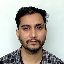

In [21]:
for images, labels in train_ds.take(1):
  for i in range(images.shape[0]):
    img_loaded = array_to_img(images[i])  # Convert the tensor to a PIL Image
    display(img_loaded)
    break  # Display only the first image of the batch
  break

In [22]:
img_data = img_to_array(img_loaded)
img_data.shape

(64, 64, 3)

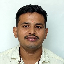

In [23]:
for images, labels in test_ds.take(1):
  for i in range(images.shape[0]):
    img_loaded = array_to_img(images[i])  # Convert the tensor to a PIL Image
    display(img_loaded)
    break  # Display only the first image of the batch
  break

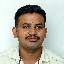

In [24]:
for images, labels in val_ds.take(1):
  for i in range(images.shape[0]):
    img_loaded = array_to_img(images[i])  # Convert the tensor to a PIL Image
    display(img_loaded)
    break  # Display only the first image of the batch
  break

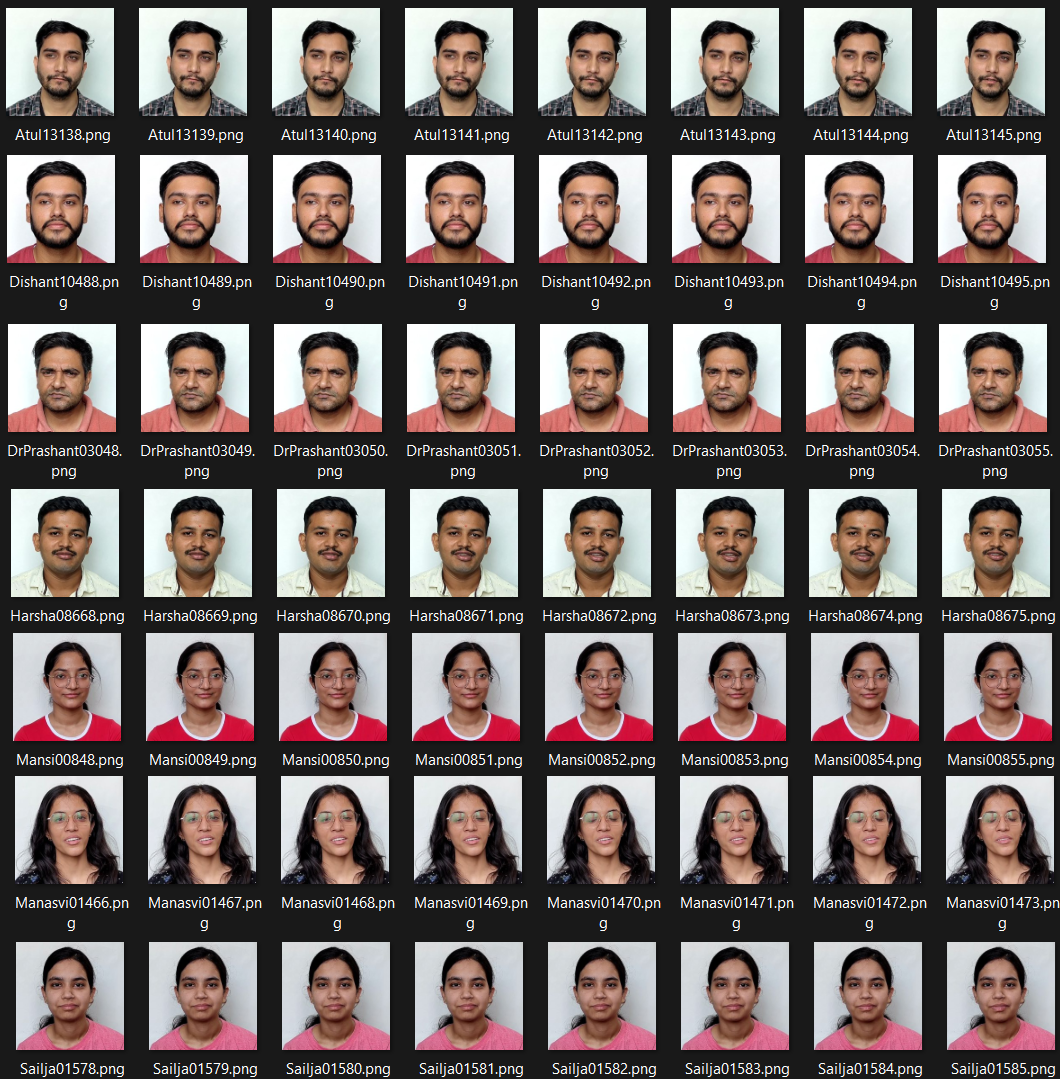

In [25]:
img_loaded = None

for file_path in img_files:
  if os.path.isfile(file_path):
    img_loaded = load_img(file_path)
    break

if img_loaded is not None:
  display(img_loaded)
else:
  print("No valid image files found in the list.")

In [26]:
img_data = img_to_array(img_loaded)
img_data.shape

(1079, 1060, 3)

In [27]:
example_batch_imgs,example_batch_y=train_ds.take(1).get_single_element()
example_batch_imgs.shape

TensorShape([32, 64, 64, 3])

In [28]:
display(example_batch_y[0])
print(example_batch_y[0].shape)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>

(2,)


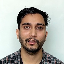

In [29]:
array_to_img(example_batch_imgs[0])

In [30]:
input_shape = example_batch_imgs[0].shape
input_shape

TensorShape([64, 64, 3])

In [31]:
def build_model():

    # Model Layer
    model = models.Sequential(name='Lie_Truth_Model')

    # Scaling Layer
    scalled_layer = layers.Rescaling(1./255, input_shape=input_shape)
    model.add(scalled_layer)

    # Conv. Layer 1
    model.add(layers.Conv2D(filters=16,kernel_size=3,padding='same'))

    # Pooling Layer 1
    model.add(layers.MaxPooling2D(pool_size=2,strides=1))

    # Conv. Layer 2
    model.add(layers.Conv2D(filters=16,kernel_size=3,padding='same'))

    # Pooling Layer 2
    model.add(layers.MaxPooling2D(pool_size=2,strides=1))

    # Flattening Layer
    model.add(layers.Flatten())

    # Output Layer
    model.add(layers.Dense(len(class_names), activation='sigmoid'))

    # Model Compile
    model.compile(optimizer='adam',loss='bce',metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    model.summary()

    return model

c:\Users\HP\OneDrive\Desktop\truth-lie_Detection\Truth_Lie_Final_Project\tfenv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Lie_Truth_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 63, 63, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       123,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,778 (491.32 KB)

 Trainable params: 125,778 (491.32 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\HP\OneDrive\Desktop\truth-lie_Detection\Truth_Lie_Final_Project\tfenv\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


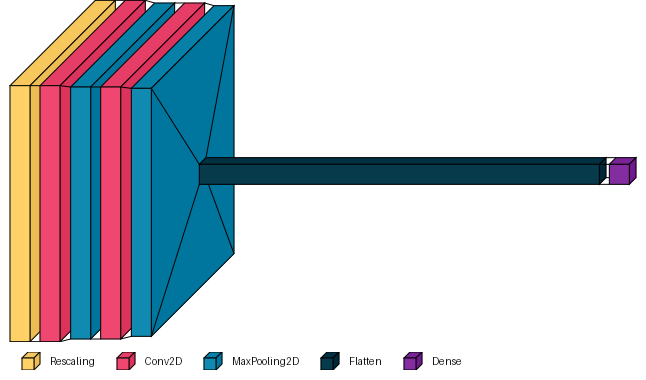

In [32]:
model1 = build_model()
vk.layered_view(model1,legend=True)

In [33]:
model1.summary()

Model: "Lie_Truth_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 63, 63, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       123,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,778 (491.32 KB)

 Trainable params: 125,778 (491.32 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
def get_callbacks(patience=5,monitor='val_accuracy'):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor,patience=patience)
  return [early_stopping]

In [35]:
history1 = model1.fit(train_ds,validation_data=val_ds,epochs=5,callbacks=get_callbacks(),batch_size=batch_size,verbose=1)

Epoch 1/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 90s 160ms/step - accuracy: 0.7774 - loss: 0.7530 - precision: 0.7769 - recall: 0.7777 - val_accuracy: 0.7150 - val_loss: 0.8901 - val_precision: 0.7158 - val_recall: 0.7143
Epoch 2/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 77s 139ms/step - accuracy: 0.9834 - loss: 0.0613 - precision: 0.9832 - recall: 0.9832 - val_accuracy: 0.7643 - val_loss: 1.1096 - val_precision: 0.7642 - val_recall: 0.7629
Epoch 3/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 90s 163ms/step - accuracy: 0.9972 - loss: 0.0165 - precision: 0.9971 - recall: 0.9970 - val_accuracy: 0.7811 - val_loss: 1.2654 - val_precision: 0.7821 - val_recall: 0.7807
Epoch 4/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 128s 232ms/step - accuracy: 0.9980 - loss: 0.0086 - precision: 0.9980 - recall: 0.9980 - val_accuracy: 0.7729 - val_loss: 1.4419 - val_precision: 0.7725 - val_recall: 0.7725
Epoch 5/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 99s 179ms/step - accuracy: 1.0000 - loss: 0.0013 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.7746 - v


 - Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8375
           1       1.00      1.00      1.00      9259

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg       1.00      1.00      1.00     17634



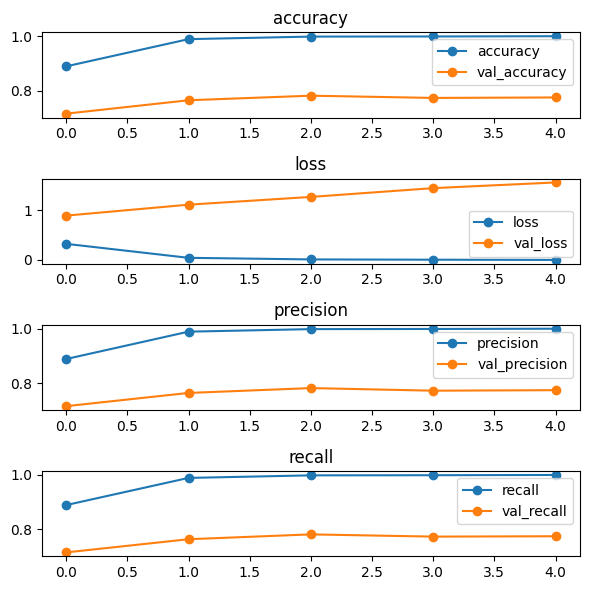

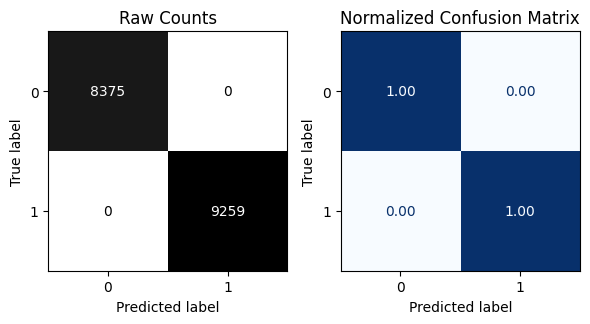


- Evaluating Training Data:
552/552 ━━━━━━━━━━━━━━━━━━━━ 76s 138ms/step - accuracy: 1.0000 - loss: 7.9297e-04 - precision: 1.0000 - recall: 1.0000
{'accuracy': 1.0, 'loss': 0.0007703977171331644, 'precision': 1.0, 'recall': 1.0}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1411
           1       0.77      0.79      0.78      1508

    accuracy                           0.77      2919
   macro avg       0.77      0.77      0.77      2919
weighted avg       0.77      0.77      0.77      2919



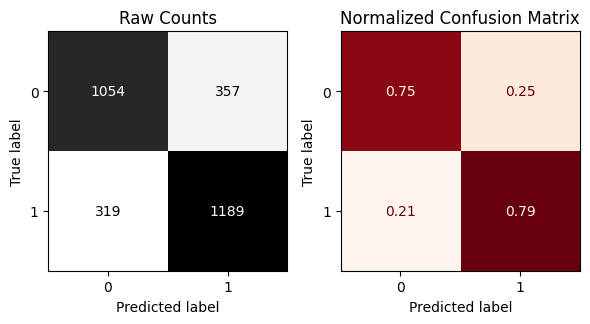


- Evaluating Test Data:
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7641 - loss: 1.6494 - precision: 0.7644 - recall: 0.7635
{'accuracy': 0.7684138417243958, 'loss': 1.6474958658218384, 'precision': 0.7688614726066589, 'recall': 0.7680712342262268}


In [36]:
evaluate_classification_network(model1,X_train=train_ds,X_test=test_ds,history=history1);

In [37]:
AUTOTUNE = tf.data.AUTOTUNE
buffer_size = len(train_ds)
buffer_size

552

In [38]:
train_ds = train_ds.cache().shuffle(buffer_size=buffer_size,seed=42).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [39]:
best_model = model1

In [40]:
import os
folder = 'best_model'
os.makedirs(folder,exist_ok=True)
model_fname = "best_model/Lie_Truth.keras"
best_model.save(model_fname)

In [41]:
path = r'C:\Users\HP\OneDrive\Desktop\truth-lie_Detection\Truth_Lie_Final_Project\best_model\Lie_Truth.keras'


In [42]:
load_model = tf.keras.models.load_model(path)
load_model.summary()

Model: "Lie_Truth_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 63, 63, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       123,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,336 (1.44 MB)

 Trainable params: 125,778 (491.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,558 (982.65 KB)

In [43]:
# TEST PREDICTION

# Load the image
img = load_img('Mansi04559.png', target_size=(64, 64))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make predictions
predictions = load_model.predict(img_array)

# Process predictions
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {predictions[0]}")

predicted_class_name = class_dict.get(predicted_class, "Unknown")
print(f"Predicted class name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted class: 1
Class probabilities: [0.00248726 0.9975601 ]
Predicted class name: Truth


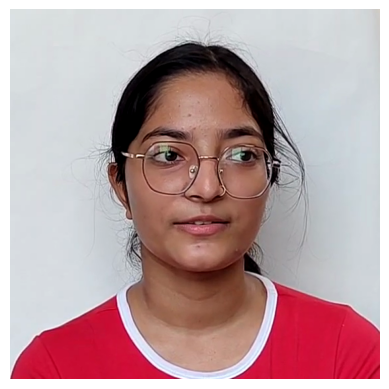

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read and display image
img = mpimg.imread('Mansi04559.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [45]:
# TEST PREDICTION

# Load the image
img = load_img('Pankaj.jpg', target_size=(64, 64))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make predictions
predictions = load_model.predict(img_array)

# Process predictions
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {predictions[0]}")

predicted_class_name = class_dict.get(predicted_class, "Unknown")
print(f"Predicted class name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted class: 1
Class probabilities: [0.05999731 0.9783387 ]
Predicted class name: Truth


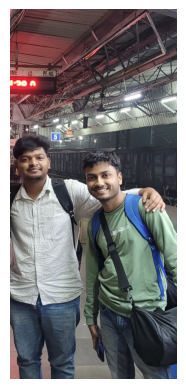

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read and display image
img = mpimg.imread('Pankaj.jpg')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [48]:
# TEST PREDICTION

# Load the image
img = load_img('P_Pic.jpg', target_size=(64, 64))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make predictions
predictions = load_model.predict(img_array)

# Process predictions
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {predictions[0]}")

predicted_class_name = class_dict.get(predicted_class, "Unknown")
print(f"Predicted class name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class: 1
Class probabilities: [0.00903832 0.99403703]
Predicted class name: Truth


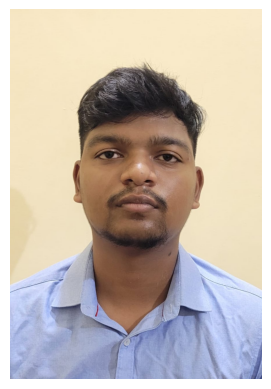

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read and display image
img = mpimg.imread('P_Pic.jpg')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [50]:
# TEST PREDICTION

# Load the image
img = load_img('Lie.png', target_size=(64, 64))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make predictions
predictions = load_model.predict(img_array)

# Process predictions
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {predictions[0]}")

predicted_class_name = class_dict.get(predicted_class, "Unknown")
print(f"Predicted class name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: 0
Class probabilities: [1.000000e+00 1.386679e-08]
Predicted class name: Lie


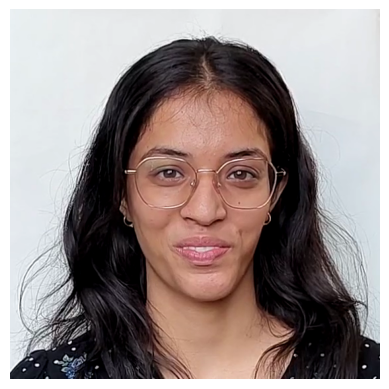

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read and display image
img = mpimg.imread('Lie.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
